# NBA 2021 : Permformance en fonction de l'âge

## Explication du sujet

Les données suivantes ont pour objectifs d'étudier le niveau d'un joueur en fonction de son age, sur la saison NBA 2021.


Le basket est un sport qui se base de plus en plus sur les statistiques. La plus utilisé et la plus révélatrice est le PER qui note l'impact réel d'un joueur sur le terrain. Pour proposer une approche qui n'a pas déjà était faite mainte fois, je n'utiliserai pas cette statistique. 

Pour mettre en valeur les performances des joueurs, je vais m'appuyer sur des informations comme :
- Leur temps de jeu
- le nombre de point marqué(s)
- Les autres grandes lignes statistiques (rebond, passe, interception, contre)
- L'efficacité (les % de shoot réussi)

Toutes ces informations sont utilisées sous formes 

## Initialisation

In [28]:
#Import des librairies utiles
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#Initialisation du theme seaborn
sns.set_theme()

In [3]:
#Ouverture du fichier CSV
nba = pd.read_csv('./data/nba2021_per_game.csv');

## Détails des données

In [4]:
nba

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,...,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5
1,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,...,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,...,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0
3,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,...,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9
4,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,...,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Delon Wright,SG,28,DET,28,23,29.4,3.7,8.1,0.456,...,0.785,1.1,3.5,4.6,4.9,1.4,0.5,1.2,1.1,10.5
493,Thaddeus Young,PF,32,CHI,23,0,25.7,5.1,8.7,0.587,...,0.500,2.4,3.4,5.8,4.4,1.4,0.5,2.0,2.9,11.2
494,Trae Young,PG,22,ATL,26,26,34.7,7.6,17.7,0.429,...,0.887,0.7,3.2,3.8,9.3,0.8,0.3,4.3,2.0,26.5
495,Cody Zeller,C,28,CHO,15,12,24.1,4.2,8.0,0.525,...,0.759,2.6,5.4,8.0,2.5,0.7,0.6,0.9,2.5,10.1


In [5]:
# Affichage de toutes les colonnes exploitables
# On observe que le jeu de données se fait sur 497 joueurs 
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  497 non-null    object 
 1   Pos     497 non-null    object 
 2   Age     497 non-null    int64  
 3   Tm      497 non-null    object 
 4   G       497 non-null    int64  
 5   GS      497 non-null    int64  
 6   MP      497 non-null    float64
 7   FG      497 non-null    float64
 8   FGA     497 non-null    float64
 9   FG%     497 non-null    float64
 10  3P      497 non-null    float64
 11  3PA     497 non-null    float64
 12  3P%     497 non-null    float64
 13  2P      497 non-null    float64
 14  2PA     497 non-null    float64
 15  2P%     497 non-null    float64
 16  eFG%    497 non-null    float64
 17  FT      497 non-null    float64
 18  FTA     497 non-null    float64
 19  FT%     497 non-null    float64
 20  ORB     497 non-null    float64
 21  DRB     497 non-null    float64
 22  TR

In [6]:
#Description des colonnes 
nba.Age.describe()

count    497.000000
mean      25.623742
std        4.054229
min       19.000000
25%       22.000000
50%       25.000000
75%       28.000000
max       37.000000
Name: Age, dtype: float64

Lecture du tableau :
- L'âge moyen d'un joueur NBA est de 25 ans (25,62)
- L'ecart type, donc la différence moyenne d'âge par rapport à l'age moyen est de 4 ans
- Le joueur le plus jeune a 19 ans.
- Le joueur le plus agé a 37 ans.

# Projet

### Sommaire : Heatmap

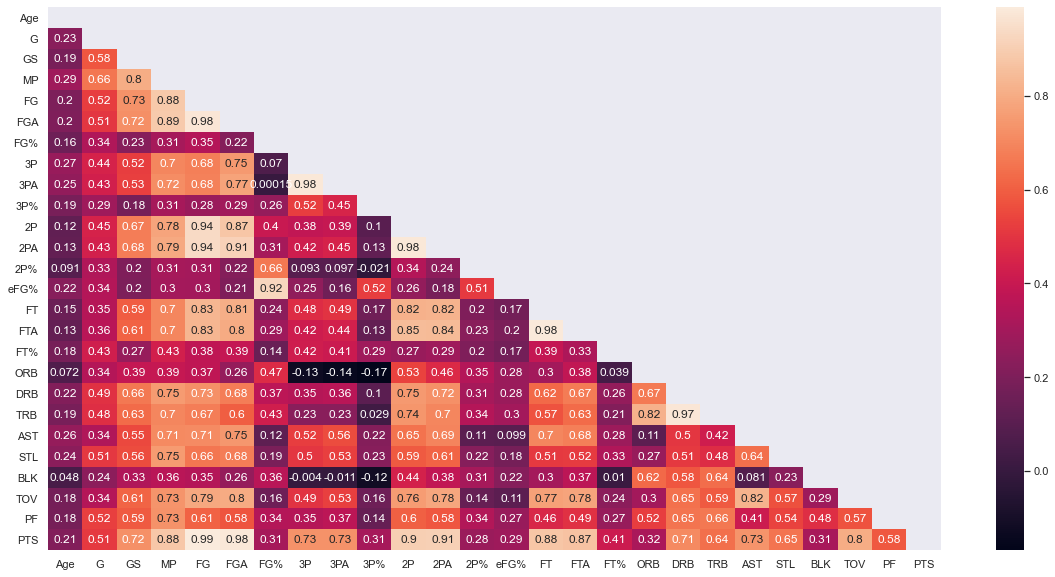

In [7]:
#sert à savoir le prix d'une maison par rapport à différent facteur
corr = nba.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, ax =ax, mask=mask)
plt.savefig('heatmapNBA.png')

Je pense que l'etude du nombre de match joué (G) et du nombre de minute joué (MP) est important pour définir le niveau de performance d'un joueur en fonction de son age car l'on peut observer une corrélation importante - 0.23 pour le nombre de match et 0.29 pour le nombre de minute. 

Le baskets a 5 statitstiques majeures :
    - Point (PTS)
    - Passe (AST)
    - Rebond (RBD)
    - Interception (STL)
    - Contre (BLK)
    
On observe sur la heatmap que les points, passes, rebonds et interceptions sont fortement corrélés à l'âge mais que le nombre de contre l'est beaucoup moins. 
J'emets donc l'hypothèse qu'il y a un lien entre l'âge et les points, rebonds, passe et interception

### I / Le nombre de match joués



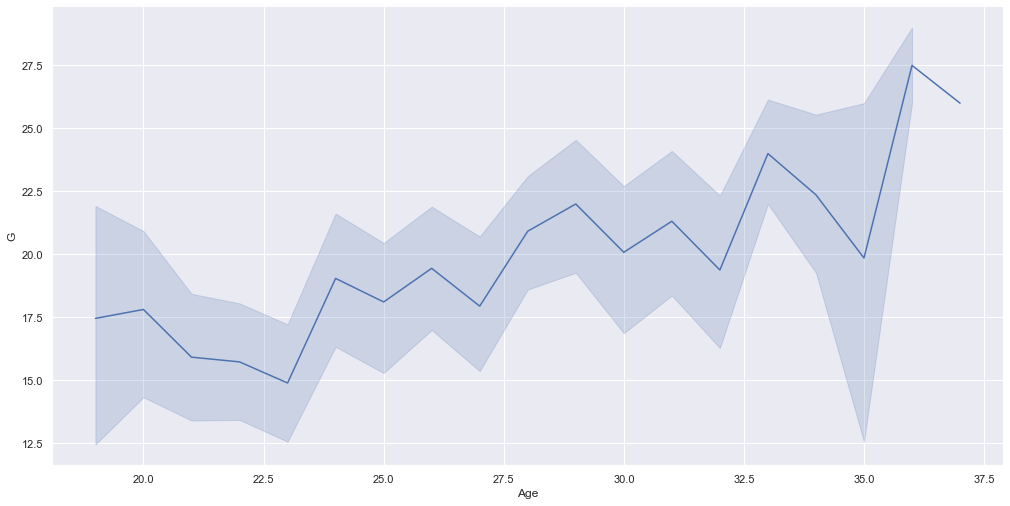

In [8]:
# Nous exploiterons ici la colonne 'G' qui indique le nombre de match joué
sns.relplot(data=nba, x="Age", y="G", height=7, aspect=2, kind='line')

On observe que le nombre de match joué augmente en fonction de l'age. En revanche, on peut penser qu'à partir de 35 ans, l'age n'est pas une information suffisante pour comprendre le nombre match joué car la variance est importante.

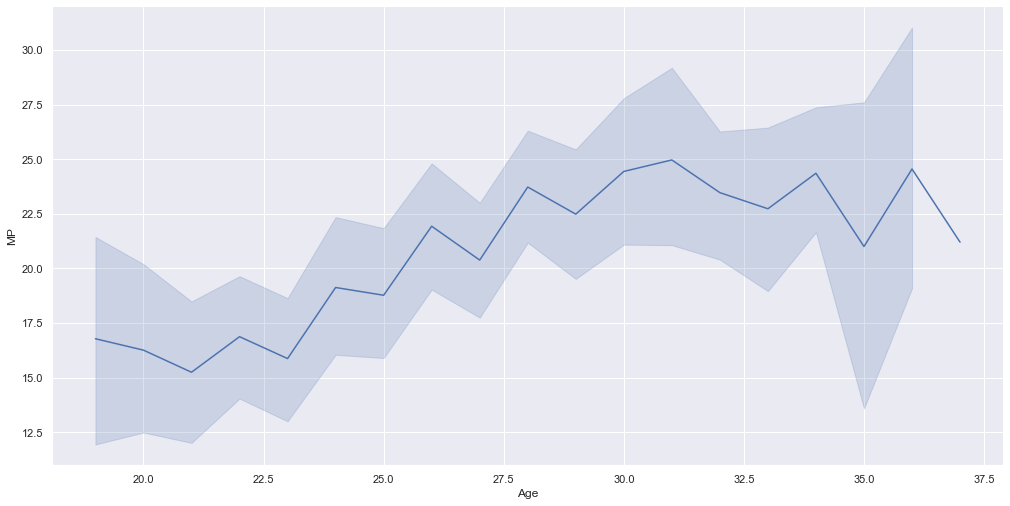

In [9]:
sns.relplot(data=nba, x="Age", y="MP", height=7, aspect=2, kind='line')

## II / La précision (%)

Dans un deuxieme temps, nous allons observer les pourcentages des joueurs
On mesure la précision de 3 facteurs en NBA, la précision global sans les lancer franc (FG), la précision des tirs à 3 points (3P), et la précision au lancer franc (FT)

#### Info 
Nous voulons tester notre échantillon uniquement sur les joueurs ayant au moins tenté 33 tirs.
Les colonnes FT, FG et 3P sont des indicateurs du nombre moyen de FT, FG et 3P mis par match, pour savoir combien ils en ont mis dans la saison, je vais multiplier cette valeur par le nombre de match joué depuis le début de la saison. 
La Series G indique le nombre de match joué par joueur.

                Formule : moyenne nombre de tir par match * nombre de match joué 

In [10]:
# Note : au lieu de créer un nouveau dataSet, je remplace juste la valeur dans FG, puisque le nombre de tentative par match
# ne m'intéresse pas
nba['FT'] = nba['FT']*nba['G']
nba['FG'] = nba['FG']*nba['G']
nba['3P'] = nba['3P']*nba['G']

In [11]:
# Afin d'éliminer toutes les données abérentes du schéma, nous avons fait un sous DataSet qui élimine tous joueurdit est "abérant".
FTP = nba[(nba['FT%']>0.4)&(nba['FT']>33)]
FGP = nba[(nba['FG%']>0.3)&(nba['FG']>33)]
TPP = nba[(nba['3P%']>0.2)&(nba['3P']>33)]

In [57]:
FGP.FG.describe()

count    314.000000
mean     105.786306
std       59.043297
min       33.600000
25%       61.075000
50%       90.550000
75%      137.575000
max      294.000000
Name: FG, dtype: float64

On peut déjà observer ici que, le nombre de tir tenté est en moyenne de 105 mais qu'il y a une variance de 59. On peut en conclure qu'il y a une forte inégalité entre les joueurs. 
Note : le nombre minimum de tir tenté dans cet échantillon est de 33 car on a filtré toute personnes ayant tenté moins de 33 tirs. 

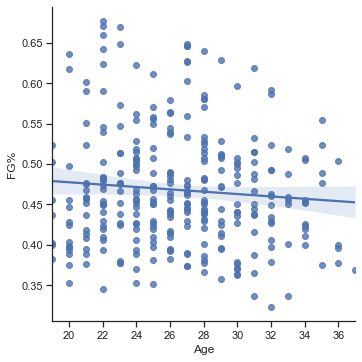

In [52]:
#On observe ici le pourcentage de précision des joueurs en fonction de leur age
sns.lmplot(data=FGP[FGP['FG%']<0.7], x="Age", y="FG%") # filtre des données abérente 

#FG% : Field Goal Percentage. Pourcentage de shoot rentré

On peut observer sur le diagramme ci-dessus que l'âge impact la précision des joueurs en nba. Plus celui ci veillis, plus la précision diminue. 
On observe aussi que plus on s'écarte de l'age de 27 ans (en plus jeune ou plus vieux), plus la variance est importante. 

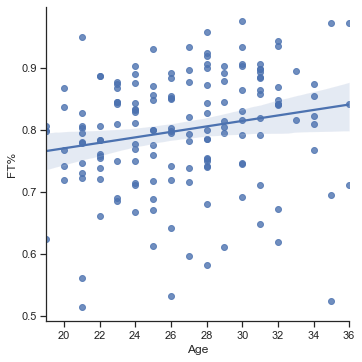

In [90]:
#POURCENTAGE AU LANCER FRANC (FT: Free Throw)
sns.lmplot(data=FTP, x="Age", y="FT%")

Contrairement à la précision global, on observe la précision au lancer franc augmente avec l'age. On remarque ici aussi que la variance est au plus faible à l'age de 27 ans, et que plus on s'éloigne de cet age, plus la variance augmente. 

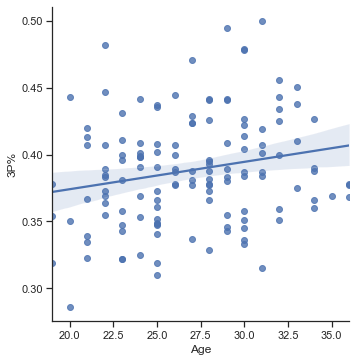

In [89]:
#POURCENTAGE AU TIR A 3 POINTS (3P: 3 point)
sns.lmplot(data=TPP, x="Age", y="3P%")

A l'instar de la précision au lancer franc, la précision à 3 points augmente avec l'age. Ici aussi, on observe que la variance diminue, plus on s'approche de l'age de 27 - 28 ans.
On peut emettre l'hypothese, à partir de cette information redondante, qu'il y a possiblement une homogénéisation du niveau de la précision vers l'âge de 27 ans. 

<AxesSubplot:xlabel='Age', ylabel='2P%'>

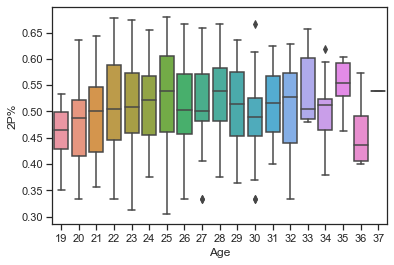

In [77]:
# L'exercice me demande d'utiliser une boite à moustache (boxplot) et de filtrer les données abérentes. 
#Je vais donc en utiliser une pour observer l'efficacité du tir à 2 points en fonction de l'age, même si la corrélation avec l'age n'est que de 0.091

sns.boxplot(data=nba[(nba['2P%']<0.7)&(nba['2P%']>0.3)], x="Age", y="2P%")

## III / Le volume 

<AxesSubplot:xlabel='Age', ylabel='3P'>

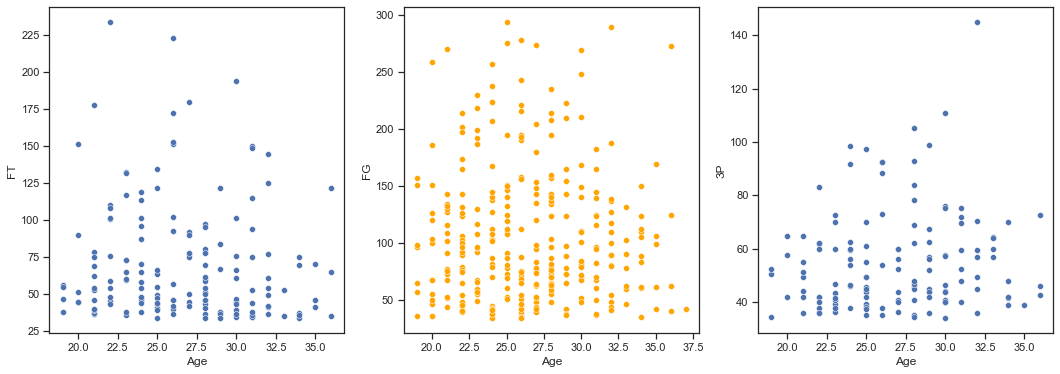

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

sns.scatterplot(data=FTP, x="Age", y="FT", ax=ax[0])
sns.scatterplot(data=FGP, x="Age", y="FG", color='orange', ax=ax[1])
sns.scatterplot(data=TPP, x="Age", y="3P", ax=ax[2])

On observe que les joueurs avec un gros volume de lancer franc ont majoritairement entre 23 et 30 ans. On peut emettre l'hypothèse que ce sont eux qui sont le plus à même d'obtenir une faute. 

Observation similaire, le volume de tir (FG: field goal) est plus important pour les joueurs entre 23 et 32 ans. 

Observation similaire, le volume de tir à 3 points est plus important pour les joueurs entre 23 et 32 ans.

Observation des statistiques de tir, on remarque que les joueurs prennent dans toutes les catégories de tir, un plus grand volume entre 25 et 30 ans. Cela suit une loi normale. 

### IV / Evolution des postes & équipe attribué

La consigne me demande d'utiliser des diagrammes avec des données catégoriques.
Je vais donc faire une étude de l'âge d'un joueur en fonction de son poste et de son équipe.
Il est en revanche difficile d'emettre une hypothese à partir de ces informations.

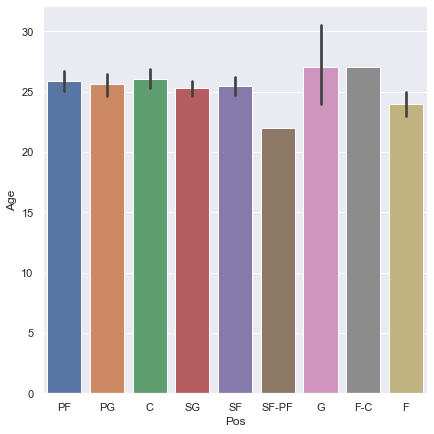

In [19]:
# On essaye ici de savoir s'il y a une corrélation entre l'age d'un joueur et son poste. 
sns.catplot(data= nba, y="Age", x="Pos", kind="bar", height=6)

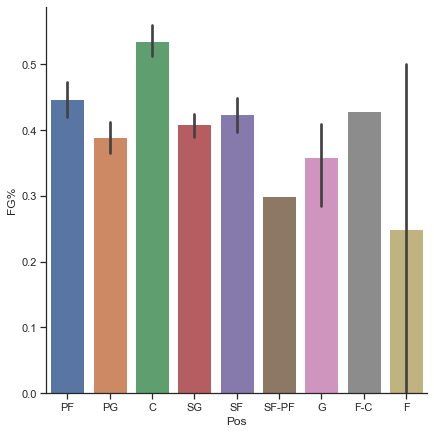

In [78]:
# Dans l'objectif de proposer 3 schémas de données catégoriques, nous allons observer la précision d'un joueur en fonction de son poste. 
# Cela ne nous aide pas à première vu dans l'analyse du niveau d'un joueur en fonction de son age. 
sns.catplot(data= nba, y="FG%", x="Pos", kind="bar", height=6)

On peut observerqu'il y a une forte variance sur le poste G (Guard: Meneur de jeu) en fonction de l'age. En revanche, la variance est très faible sur tous les autres postes. 
On remarque aussi que la répartition des postes est homogènes. 

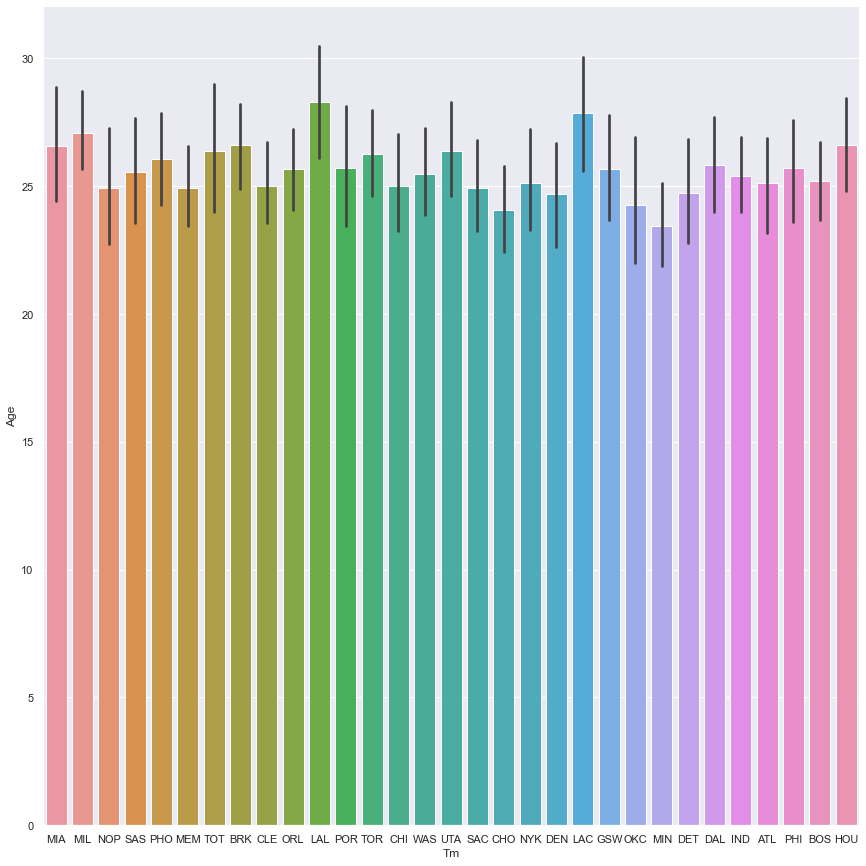

In [20]:
sns.catplot(data= nba, y="Age", x="Tm", kind="bar", height=12, aspect=1)

On observe que la variance d'âge dans les équipes est à peu près la même partout.
Pour définir l'impact que cela a sur notre étude, il faudrai faire une étude du niveau de chaque équipe et de l'impact des chaques joueurs dans cette équipe. 